# Part I : Quel(le) data scientist êtes-vous ?
## Contexte de l’analyse

Elu métier le plus sexy par la Harvard Business Review en octobre 2012, le data scientist représente un profil rare qui exige de nombreuses compétences.

A partir d'un dataset Aquila, vous réaliserez :
- un clustering non supervisé afin d'identifier 2 groupes de profils techniques distinctes
- une prédiction des profils dont le métier n'est pas labellisé


## Données
data.csv contient 6 variables : 
    - 'Entreprise' correspond à une liste d'entreprises fictive
    - 'Metier' correspond au métier parmi data scientist, lead data scientist, data engineer et data architecte
    - 'Technologies' correspond aux compétences maîtrisées par le profil
    - 'Diplome' correspond à son niveau scolaire (Bac, Master, PhD,...)
    - 'Experience' correspond au nombre d'années d'expériences
    - 'Ville' correspond au lieu de travail
    


## Répondez aux questions 

Bonne chance!

In [48]:
# Import des libraries classique (numpy, pandas, ...)
import pandas as pd
import numpy as np
import re
import sklearn as sk

import seaborn as sb
from matplotlib import pyplot as plt
plt.style.use('ggplot')

### 1) Importer le tableau de données dans un dataframe 

In [49]:
# Import du dataframe "data.csv"
df = pd.read_csv("data.csv")
print(df)



                                             Entreprise               Metier  \
0                                                Sanofi       Data scientist   
1                   Massachusetts General Hospital(MGH)      Data architecte   
2                                                 Delve  Lead data scientist   
3     Ann & Robert H. Lurie Children’s Hospital of C...       Data scientist   
4                                                   Arm       Data scientist   
...                                                 ...                  ...   
9577                Massachusetts General Hospital(MGH)       Data scientist   
9578                            Charles River Analytics       Data scientist   
9579                                     Ball Aerospace       Data scientist   
9580                              Takeda Pharmaceutical       Data scientist   
9581                                             Vertex       Data scientist   

                                       

### 2) Combien y a t-il d'observations dans ce dataset? Y a t-il des valeurs manquantes? 

### 3) Réaliser l'imputation des valeurs manquantes pour la variable "Experience" avec : 
- la valeur médiane pour les data scientists
- la valeur moyenne pour les data engineers

In [50]:
# Imputation pour Data scientist
median = df[df["Metier"] == "Data scientist"].median(skipna=True)
mean = df[df["Metier"] == "Data engineer"].mean(skipna=True)

df[df["Metier"] == "Data scientist"]['Experience'].fillna(0)
print(df)


df2=df[df["Metier"] == "Data engineer"].Experience.fillna(mean)



                                             Entreprise               Metier  \
0                                                Sanofi       Data scientist   
1                   Massachusetts General Hospital(MGH)      Data architecte   
2                                                 Delve  Lead data scientist   
3     Ann & Robert H. Lurie Children’s Hospital of C...       Data scientist   
4                                                   Arm       Data scientist   
...                                                 ...                  ...   
9577                Massachusetts General Hospital(MGH)       Data scientist   
9578                            Charles River Analytics       Data scientist   
9579                                     Ball Aerospace       Data scientist   
9580                              Takeda Pharmaceutical       Data scientist   
9581                                             Vertex       Data scientist   

                                       

### 4) Combien d'années d'expériences ont, en moyenne, chacun des profils : le data scientist, le lead data scientist et le data engineer en moyenne?

In [21]:

print(df[df["Metier"] == "Data scientist"].Experience.mean)

<bound method Series.mean of 0         1
3       1,5
4       NaN
6         0
7         4
       ... 
9577    1,5
9578     11
9579      1
9580     17
9581      0
Name: Experience, Length: 3865, dtype: object>


### 5) Faire la représentation graphique de votre choix afin de comparer le nombre moyen d'années d'expériences pour chaque métier

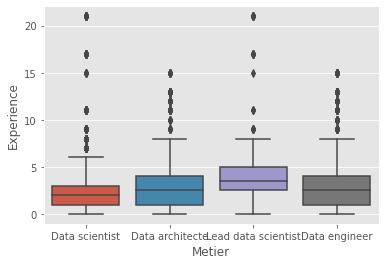

### 6) Transformer la variable continue 'Experience' en une nouvelle variable catégorielle 'Exp_label' à 4 modalités: débutant, confirmé, avancé et expert
- Veuillez expliquer votre choix du règle de transformation.  

c:\users\mzhang\anaconda3\envs\pytorch_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


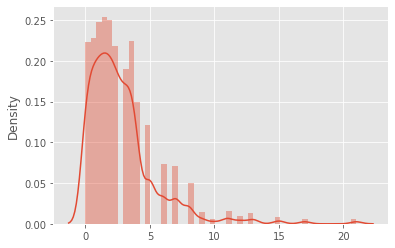

### 7) Quelles sont les 5 technologies les plus utilisées? Faites un graphique

57 technologies sont listee


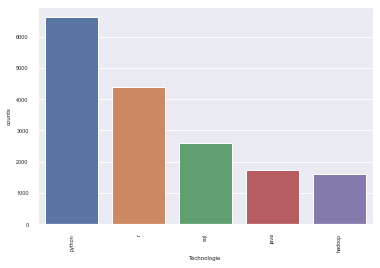

### 8) Réaliser une méthode de clustering non supervisée de votre choix pour faire apparaître 2 clusters que vous jugerez pertinents. Donnez les caractéristiques de chacun des clusters.
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

                                            Technologies  group
6115  SAS/Teradata/SQL/R/Python/Machine learning/Anglais      1
3101                                   C/C++/Java/Python      0
8333                        Elasticsearch/Kibana/MongoDB      0
1348      Python/Tensorflow/scikit-learn/Deep learning/R      1
2695      Excel/Python/Matlab/R/machine learning/anglais      1
6058        SPSS/Excel/SAS/R/machine learning/AI/Scoring      1
5500                                  MongoDB/SQL/Docker      0
6851                            R/Python/Hadoop/Hive/SQL      1
8735                MariaDB/MongoDB/NoSQ/SQL/Hadoop/Hive      0
1444                        R/machine learning/Excel/VBA      1
0    5208
1    4374
Name: group, dtype: int64


### 9) Réaliser la prédiction des métiers manquants dans la base de données par l'algorithme de votre choix
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

                  Entreprise               Metier                                        Technologies   Diplome  Experience     Ville Exp_label  Metier_encoded  Diplome_encoded                                                                                                                                               checklist
2537           Payette Group       Data scientist                                         Excel/VBA/R    Master         0.5  Toulouse  débutant               2                2  [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2153            Ontoforce NV       Data scientist  SAS/Teradata/SQL/R/Python/Machine learning/Anglais    Master         0.0      Lyon  débutant               2                2  [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4611  Vertex 